In [1]:
!!pip install xgboost

^C


[]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
#from sklearn.ensembme import Voting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
cp = pd.read_csv('e:\carpricepr.csv')
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
cp.drop(['Model','Drive wheels','Leather interior',
         'Manufacturer','Cylinders','Gear box type',
         'Doors','Wheel','ID'],axis=1,inplace=True)

In [5]:
def evaluate(y_test, y_hat):
    mse= mean_squared_error(y_test,y_hat)
    rmse= np.sqrt(mean_squared_error(y_test,y_hat))
    #print(confusion_matrix(y_test,y_hat))
    #print(accuracy_score(y_test,y_hat))
    #print(precision_score(y_test,y_hat))
    r2 = r2_score(y_test,y_hat)
    print(mse,rmse,r2)
def test(model, X_train, X_test, y_train,y_test):
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    #y_prob = model.predict_proba(X_test)[:, 1]
    evaluate(y_test,y_hat)
    
lor = LogisticRegression(solver ='liblinear')
lr = LinearRegression()

In [6]:
cp['Total Price'] = 0
cp.replace('-',0,inplace=True)

In [7]:
cp['Levy']= cp['Levy'].astype(int)
cp['Total Price'] = cp['Price'] +cp['Levy']
cp.head(3)

,Price,Levy,Prod. year,Category,Fuel type,Engine volume,Mileage,Color,Airbags,Total Price
0,13328,1399,2010,Jeep,Hybrid,3.5,186005 km,Silver,12,14727
1,16621,1018,2011,Jeep,Petrol,3,192000 km,Black,8,17639
2,8467,0,2006,Hatchback,Petrol,1.3,200000 km,Black,2,8467


In [8]:
cp.drop('Category', axis =1 , inplace = True)

#차량의 종류는 많기 때문에 삭제
fuel ={'Hybrid':1 ,'Petrol':2,'Diesel':3, 'CNG':4, "LPG":5,"Plug-in Hybrid":6,"Hydrogen":7}
Color = {'Black':0,'White':1,'Blue':2, 'Silver':3, 'Red':4, 'Grey':5, 'Green':6 , 'Beige':7,'Orange':8,'Sky blue':9,'Brown':10,
         'Yellow':11,'Carnelian red':12,'Golden':13,'Purple':14,'Pink':15}
## Fuel, Color로 분리
cp['Mileage']= cp['Mileage'].str.split("km").str.get(0)
cp['Mileage']= cp['Mileage'].astype(int)
cp['Engine volume'] = cp['Engine volume'].str.split("Turbo").str.get(0)
cp['Engine volume'] = cp['Engine volume'].astype(float)
cp['Used.year']= 2022 - cp['Prod. year']
## 거리수가 숫자 + km 문자열로 저장되어있어서, 분리후 숫자를 취함
cp.drop(['Price','Levy','Prod. year'], axis=1, inplace = True)

In [9]:
cp.head(3)

,Fuel type,Engine volume,Mileage,Color,Airbags,Total Price,Used.year
0,Hybrid,3.5,186005,Silver,12,14727,12
1,Petrol,3.0,192000,Black,8,17639,11
2,Petrol,1.3,200000,Black,2,8467,16


In [10]:
f = [] #fuel 리스트
c = [] #color 리스트
for i in range(0,len(cp['Fuel type'])):
    f.append(fuel[cp['Fuel type'].iloc[i]])
    c.append(Color[cp['Color'].iloc[i]])

In [11]:
cp['Fuel type'] = f
cp['Color'] = c
## 연료 사용을 사전 형식으로 매칭 시켜서 a 리스트에 저장 후 'Fuel type' 피쳐값을 갱신, 마찬가지로 color도 똑같이 적용

In [12]:
cp.head(3)

,Fuel type,Engine volume,Mileage,Color,Airbags,Total Price,Used.year
0,1,3.5,186005,3,12,14727,12
1,2,3.0,192000,0,8,17639,11
2,2,1.3,200000,0,2,8467,16


In [20]:
std= StandardScaler()
MaM = MinMaxScaler()
poly= PolynomialFeatures(degree=7)
y = cp['Total Price']
X = cp.drop(['Total Price'], axis= 1 , inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train= std.fit_transform(X_train)
X_test = std.transform(X_test)


In [14]:
lr.fit(X_train, y_train)
lry_hat =lr.predict(X_test)
evaluate(y_test,lry_hat)
#test(lor, X_train,X_test,y_train, y_test)

neg_mse_scores = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse= np.mean(rmse_scores)
print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

294366675.2183137 17157.11733416525 0.05760409145007139
[-3.85461049e+08 -3.19371005e+08 -5.25169786e+08 -3.26095603e+08
 -1.80058031e+11]
[ 19633.16197822  17870.95423388  22916.58320851  18058.11736318
 424332.45348186]
100562.2540531288


19852.819754920165
[ 2949.58332532  2195.60821981  -306.9640903  -1208.731385
 -3900.91105919 -2775.30003944]


<BarContainer object of 6 artists>

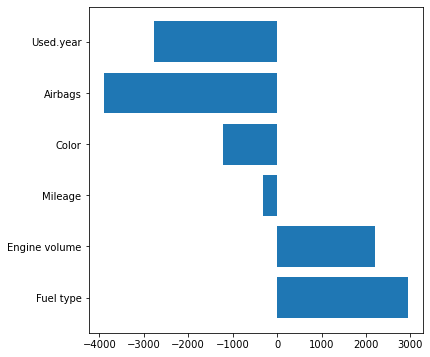

In [15]:
print(lr.intercept_)
print(lr.coef_)
lr_coeff = pd.Series(data=lr.coef_, index=X.columns)
lr_coeff.sort_values(ascending=True)

fig ,axs = plt.subplots(figsize =(6,6))
axs.barh(X.columns,lr.coef_)

In [16]:
ridge = Ridge(alpha=7)
test(ridge, X_train, X_test, y_train, y_test)
ridge_coef=pd.DataFrame(data=ridge.coef_,index=X.columns) 
rneg_mse_scores = cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=5)
rrmse_scores = np.sqrt(-1*rneg_mse_scores)
ravg_rmse= np.mean(rrmse_scores)
print(rneg_mse_scores)
print(rrmse_scores)
print(ravg_rmse)
ridge_coeff = pd.Series(data=ridge.coef_, index=X.columns)
ridge_coeff.sort_values(ascending=True)

294366067.6262825 17157.099627451094 0.057606036616737466
[-3.85461952e+08 -3.19371742e+08 -5.25171666e+08 -3.26096366e+08
 -1.80058014e+11]
[ 19633.18495558  17870.97485506  22916.62422467  18058.1385046
 424332.43325768]
100562.2711595172


Airbags         -3898.190966
Used.year       -2773.090831
Color           -1208.299803
Mileage          -306.906636
Engine volume    2193.923623
Fuel type        2948.379485
dtype: float64

<BarContainer object of 6 artists>

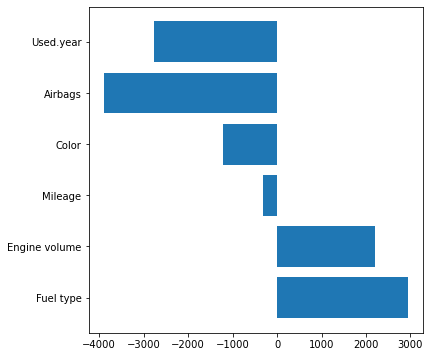

In [17]:
fig ,axs = plt.subplots(figsize =(6,6))
axs.barh(X.columns,ridge.coef_)

In [18]:
lasso = Lasso(alpha=100)
test(lasso, X_train, X_test, y_train, y_test)

lneg_mse_scores = cross_val_score(lasso,X,y,scoring='neg_mean_squared_error',cv=5)
lrmse_scores = np.sqrt(-1*lneg_mse_scores)
lavg_rmse= np.mean(lrmse_scores)
print(lneg_mse_scores)
print(lrmse_scores)
print(lavg_rmse)

lasso_coeff = pd.Series(data=lasso.coef_, index=X.columns)
lasso_coeff.sort_values(ascending=True)


294393717.72676635 17157.90540033271 0.05751751660492699
[-3.85605265e+08 -3.19461409e+08 -5.25448024e+08 -3.26140319e+08
 -1.80057610e+11]
[ 19636.8343865   17873.48340009  22922.65306691  18059.35543151
 424331.95768929]
100564.85679486036


Airbags         -3754.153444
Used.year       -2643.055070
Color           -1121.402658
Mileage          -212.343820
Engine volume    2074.640606
Fuel type        2861.704317
dtype: float64

<BarContainer object of 6 artists>

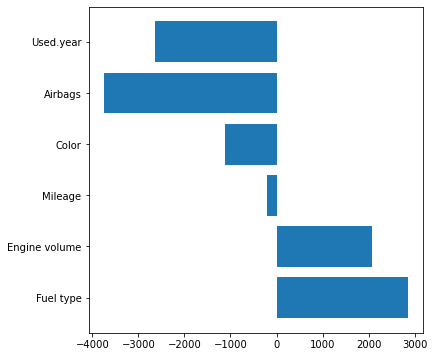

In [19]:
fig ,axs = plt.subplots(figsize =(6,6))
axs.barh(X.columns,lasso.coef_)

In [351]:
## Lr,릿지,라쏘로는 가격에 영향을 받는 요소를 알수 없었다.
# PCA로 했을때 구별가능한 Fuel Type를 이용해서 가격의 분포를 알아보자


cp_feature_names = ['Color','Fuel type','Used.year','Total Price','Airbags','Mileage','Engine volume']
cp.data = cp.iloc[:,:]
cp.data

C:\Users\User\AppData\Local\Temp\ipykernel_16136\3471781840.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cp.data = cp.iloc[:,:]


,Fuel type,Engine volume,Mileage,Color,Airbags,Total Price,Used.year
0,1,3.5,186005,3,12,14727,12
1,2,3.0,192000,0,8,17639,11
2,2,1.3,200000,0,2,8467,16
3,1,2.5,168966,1,0,4469,11
4,2,1.3,91901,3,4,12172,8
...,...,...,...,...,...,...,...
19232,4,2.0,300000,3,5,8467,23
19233,2,2.4,161600,4,8,16512,11
19234,3,2.0,116365,5,4,26944,12
19235,3,2.0,51258,0,4,6619,15


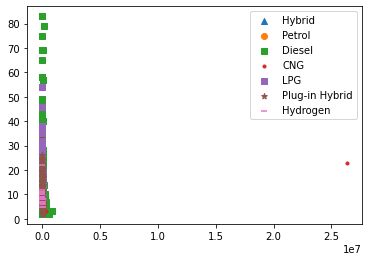

In [352]:
cp_co = pd.DataFrame(cp.data, columns=cp_feature_names)
fuel_names=['Hybrid' ,'Petrol','Diesel', 'CNG', "LPG","Plug-in Hybrid","Hydrogen"]
markers = ['^','o','s', '.' , ',','*','_']
for i, marker in enumerate(markers):
    x= cp_co[cp_co['Fuel type']==i].iloc[:,3] # Fuel type
    y= cp_co[cp_co['Fuel type']==i].iloc[:,2] # Price
    plt.scatter(x,y,marker=marker,label=fuel_names[i])
plt.legend()
plt.show()

In [354]:
cp_co.iloc[:,3] # Total Price 확인

0        14727
1        17639
2         8467
3         4469
4        12172
         ...  
19232     8467
19233    16512
19234    26944
19235     6619
19236     1223
Name: Total Price, Length: 19237, dtype: int64

In [355]:
pca= PCA(n_components=2)
cp_scaled= std.fit_transform(cp.iloc[:,1:])
cp_pca = pca.fit_transform(cp_scaled)
cp_df= pd.DataFrame(cp_pca,columns=['comp1','comp2'])
cp_df['Fuel type'] = cp['Fuel type']
cp_df.head()

,comp1,comp2,Fuel type
0,1.305379,0.774450,1
1,0.896665,0.643430,2
2,-1.341117,0.071930,2
3,-0.698523,0.269610,1
4,-0.726708,-1.018328,2


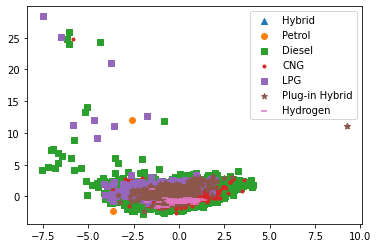

In [356]:
for i, marker in enumerate(markers):
    x= cp_df[cp_df['Fuel type']==i].iloc[:,0]
    y= cp_df[cp_df['Fuel type']==i].iloc[:,1]
    plt.scatter(x,y, marker=marker, label=fuel_names[i])
plt.legend()
plt.show()

In [357]:
rf_X = X_train
rf_y = y_train

In [366]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(rf_X,rf_y)
neg_mse_scores = cross_val_score(rf,rf_X,rf_y, scoring= "neg_mean_squared_error",cv=5)
rf_rmse=np.sqrt(-1*neg_mse_scores)
rf_avg=np.mean(rf_rmse)

print(neg_mse_scores)
print(rf_rmse)
print(rf_avg)

[-2.57038089e+11 -1.02070282e+11 -1.53069419e+10 -1.70221399e+09
 -1.49080059e+08]
[506989.23967199 319484.39997964 123721.22644651  41257.89608581
  12209.83453013]
200732.51934281585


In [411]:
rf_y_train_pred = rf.predict(X_train)
rf_y_test_pred = rf.predict(X_test)

rf_imp = rf.feature_importances_
rf_imp = pd.DataFrame([X.columns, rf_imp]).T
rf_imp.columns = ['variables','importance']
sorted_rf_idx = np.argsort(rf_imp['importance'])[::-1]
rf_imp = rf_imp.iloc[sorted_rf_idx,:]
print(rf_imp[rf_imp['importance']>0.000005])

       variables importance
1  Engine volume   0.332317
5      Used.year   0.233039
2        Mileage   0.139263
0      Fuel type   0.110501
4        Airbags   0.104215
3          Color   0.080665


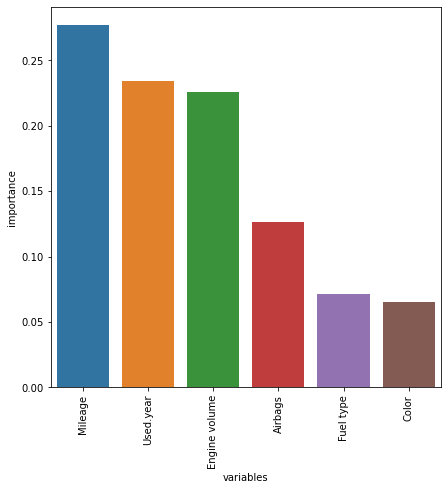

In [333]:
fig, ax= plt.subplots(figsize=(7,7))
sns.barplot(x='variables',y='importance',data=rf_imp,ax=ax)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show(fig)

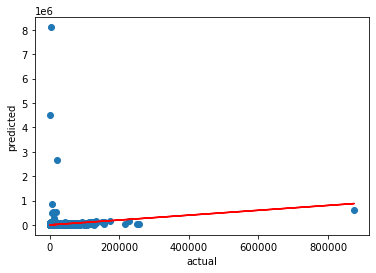

In [416]:
plt.scatter(y_test,rf_y_test_pred)
plt.plot(y_test,y_test,'r-')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [413]:
clf = DecisionTreeRegressor(criterion='squared_error',max_depth=15, random_state=1500)
clf.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=1500)

In [414]:
clf_y_train_pred = clf.predict(X_train)
clf_y_test_pred = clf.predict(X_test)

clf_imp = clf.feature_importances_
clf_imp = pd.DataFrame([X.columns, clf_imp]).T
clf_imp.columns = ['variables','importance']
sorted_clf_idx = np.argsort(clf_imp['importance'])[::-1]
clf_imp = clf_imp.iloc[sorted_clf_idx,:]
print(clf_imp[clf_imp['importance']>0.000005])

       variables importance
5      Used.year     0.4992
0      Fuel type   0.407497
4        Airbags   0.080862
2        Mileage   0.010894
1  Engine volume    0.00123
3          Color   0.000316


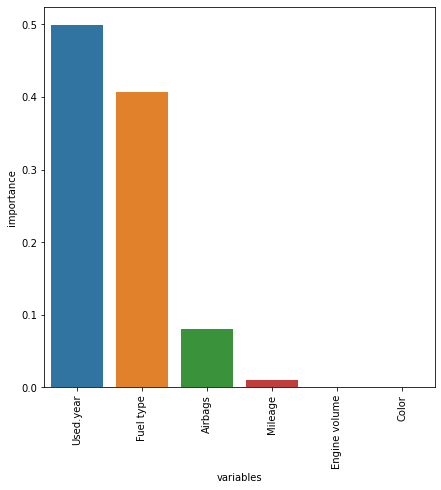

In [415]:
fig, ax= plt.subplots(figsize=(7,7))
sns.barplot(x='variables',y='importance',data=clf_imp,ax=ax)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show(fig)

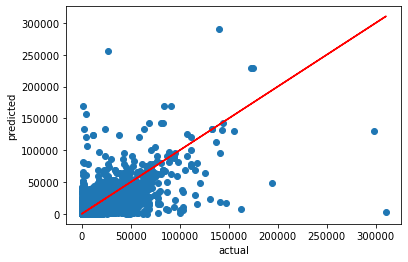

In [362]:
plt.scatter(y_test,clf_y_test_pred)
plt.plot(y_test,y_test,'r-')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

<AxesSubplot:>

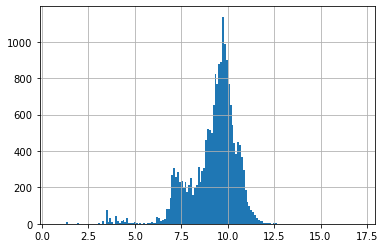

In [418]:
# Log Scale로 분석
y_log= np.log1p(cp['Total Price'])
y_log.hist(bins='auto')

In [420]:
X_train, X_test, y_train,y_test= train_test_split(X,y_log,test_size=0.3)
lr.fit(X_train, y_train)
# Log Scale 선형예측 학습
y_hat = lr.predict(X_test)

y_test_exp = np.expm1(y_test)
y_hat_exp = np.expm1(y_hat)
evaluate(y_test_exp,y_hat_exp)

338578488.990494 18400.502411360783 -0.05620200981721357


<BarContainer object of 6 artists>

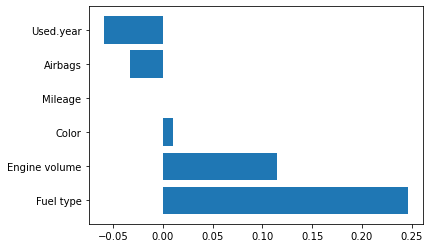

In [421]:
coef= pd.DataFrame(data=log_lr.coef_,columns=['value'])
coef['name']=X.columns
sorted= coef.sort_values(by='value',ascending=False)
plt.barh(sorted['name'],sorted['value'])

In [24]:
X_poly = poly.fit(X_train)


AttributeError: 'PolynomialFeatures' object has no attribute 'transForm'